In [2]:
#calculate dpa through SRIM simulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 


0     0.058700
1     0.064075
2     0.065075
3     0.068925
4     0.070875
        ...   
95    0.000175
96    0.000375
97    0.000050
98    0.000000
99    0.000000
Name: V_Ni, Length: 100, dtype: float64


/var/folders/k_/k89n8v0j34j1rkb6vmcfvz7c0000gn/T/ipykernel_69423/1863751948.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(fn, skiprows=29, nrows=100, sep='  ', names=['depth','V_Ni' ,'V1', 'V2'],header=None)


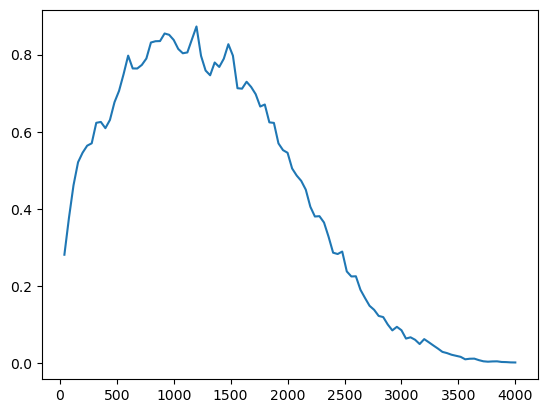

In [27]:
path='/Users/ruhe/Desktop/ga2o3/SRIM_dpa'
path='/home/heruhe/Desktop/Ga2o3/combine_cells/SRIM/quick_calculation'
path='/Users/ruhe/Desktop/ga2o3/SRIM_dpa/full_cascade-beta-ga2o3-Ni-400kev-1000'
fn=path+'/VACANCY.txt'
# Read the CSV file with specified parameters
df = pd.read_csv(fn, skiprows=29, nrows=100, sep='  ', names=['depth','V_Ni' ,'V1', 'V2'],header=None)

# Assuming 'df' is your DataFrame
for column in df.columns:
    # Replace commas with dots as decimal separator
    df[column] = df[column].str.replace(',', '.')
    
    # Convert to numeric
    df[column] = pd.to_numeric(df[column], errors='coerce')

print(df['V_Ni'])
flunce=2*10**14
atom_density=9.45*10**22
df['dpa']=(df['V_Ni']+df['V1']+df['V2'])*flunce/atom_density*10**8
plt.plot(df['depth'],df['dpa'])


In [30]:

#function to calculate displacements-per-atom (dpa)
def DPA(E,npka,estop,n,TDE):
    #input E:recoil energy
    #npka:cascade times
    #estop:electronic stopping power,obtained by lammps logfile output stable 'f_elstop'
    #n:number of atoms
    #TDE: lattice dis-placement energy
    #output: dpa value
    Td=E-estop
    return npka*0.8*Td/(2*TDE*n)
TDEO1=17.44
TDEO2=17.38
TDEO3=17.07
TDEGa1=22.91
TDEGa2=20.04
mO=15.9994
mGa=69.72
TDEga2o3=((TDEO1+TDEO2+TDEO3)*mO+(TDEGa1+TDEGa2)*mGa)/(2*mGa+3*mO)
print((TDEGa1+TDEGa2)/2,(TDEO1+TDEO2+TDEO3)/3)

21.475 17.296666666666667


In [31]:
DPA(1500,10,193.294,81920,TDEga2o3)

0.0031268756296879514

In [35]:

pkal=np.zeros(40)
i=0
for dpa in df['dpa']:

    for pka in range(0,2001,10):
        c_dpa=DPA(1500,pka,193.294,81920,TDEga2o3)
        if np.abs(c_dpa-dpa)<=0.002:
            print(pka)
            pkal[i]=pka
            i+=1
            break

print(pkal)


900
1200
1470
1660
1740
1800
1820
1990
2000
1950
2000
1990
1820
1760
1740
1610
1550
1510
1440
1300
1220
1220
1170
1050
920
900
920
760
720
720
610
540
480
440
390
380
320
270
300
270
200


IndexError: index 40 is out of bounds for axis 0 with size 40

In [ ]:
for i in 1100. 1170. 1270. 1340. 1390. 1420. 1460. 1490. 1560. 1520. 1550. 1550. 1540. 1500. 1410. 1350. 1280. 1160. 1060.  940.  830.  730.  630.  500. 410
do                                             
  scp -r heru1111@mahti.csc.fi:/scratch/djurabek/heru/ga2o3/overlapping/cascade_anneal/small1500ev/out/data.lastframe-"$i" .
done                                        

